In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read Train and Test File
train_df=pd.read_csv("Train_UWu5bXk.csv")
test_df=pd.read_csv("Test_u94Q5KV.csv")

In [3]:
train_df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [4]:
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
train_df.shape

(8523, 12)

In [6]:
test_df.shape

(5681, 11)

In [7]:
#printing missing values in each coloumn in both train n test DF
k=pd.DataFrame()
k['train_df']=train_df.isnull().sum()
k['test_df']=test_df.isnull().sum()
k


,train_df,test_df
Item_Identifier,0,0.0
Item_Weight,1463,976.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,2410,1606.0
Outlet_Location_Type,0,0.0


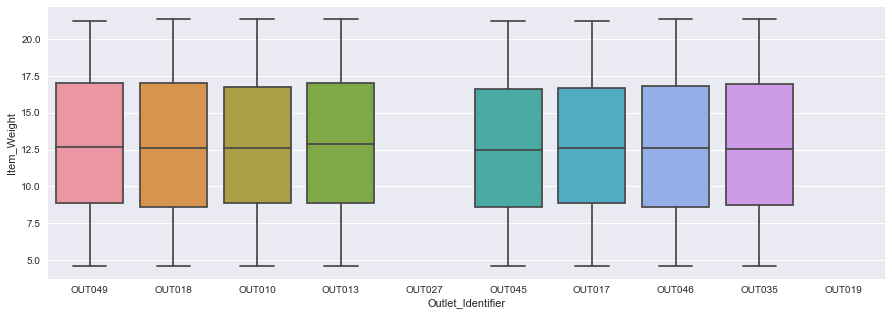

In [10]:
# EDA - Boxplot which shows distribution of Item_Weight across Outlet Identifiers
plt.subplots(figsize=(15,5))

sns.boxplot(y='Item_Weight',x='Outlet_Identifier', data=train_df)
#sns.countplot(train_df['Item_Type'],palette='summer')

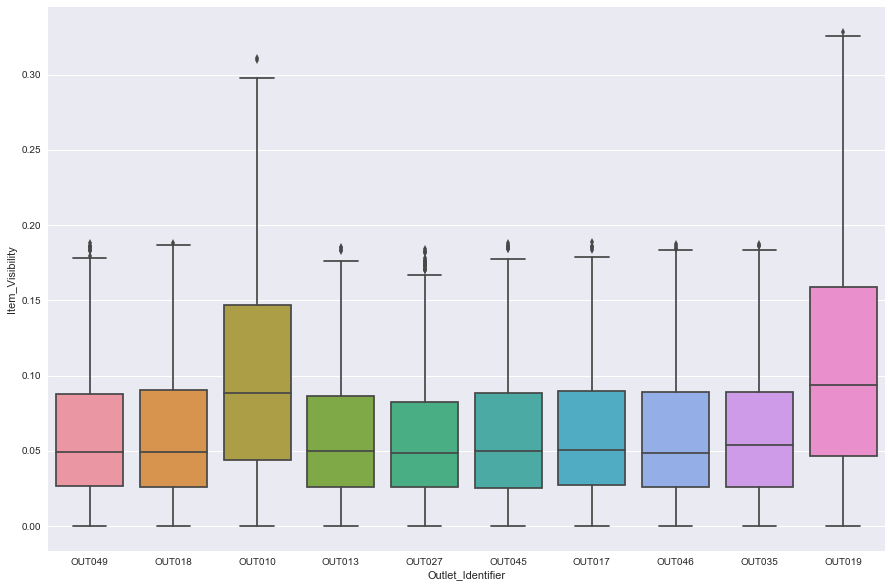

In [9]:
# 
plt.subplots(figsize=(15,10))

sns.boxplot(y='Item_Visibility',x='Outlet_Identifier', data=train_df)
#sns.countplot(train_df['Item_Type'],palette='summer')
# OUT010 and OUT019 have more item  visibility, which means they could belong to small grocery stores

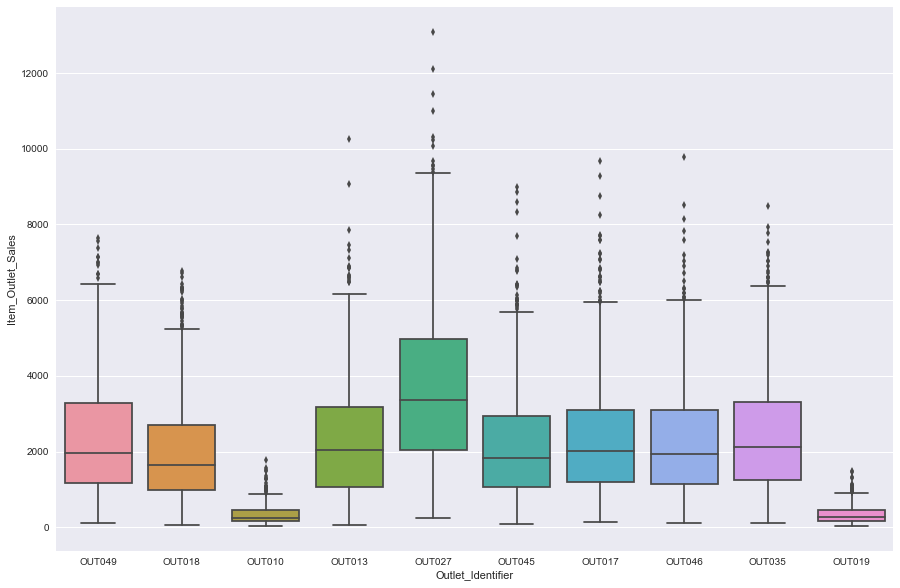

In [38]:
# EDA
plt.subplots(figsize=(15,10))

sns.boxplot(y='Item_Outlet_Sales',x='Outlet_Identifier', data=train_df)
#sns.countplot(train_df['Item_Type'],palette='summer')
#The previous assumption holds true. Sales of OUT010 and OUT019 are less. 

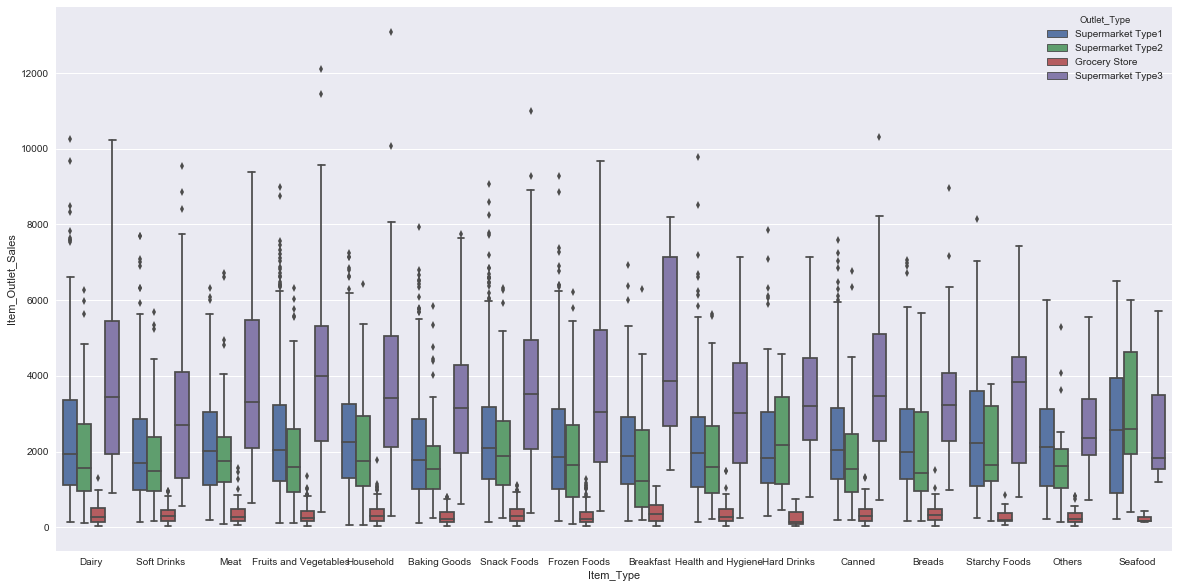

In [39]:
plt.subplots(figsize=(20,10))

sns.boxplot(y='Item_Outlet_Sales',x='Item_Type', hue='Outlet_Type', data=train_df)

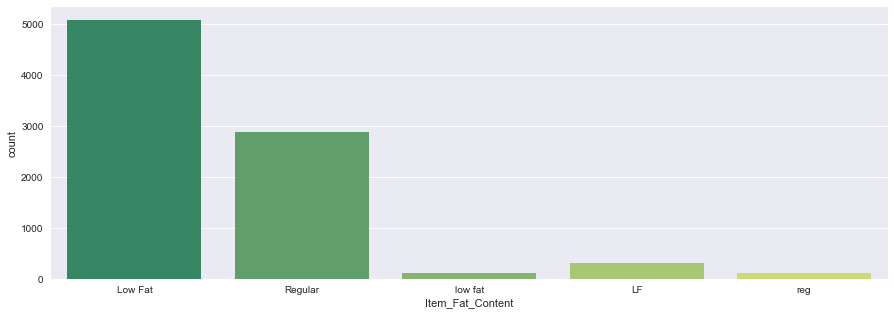

In [40]:
plt.subplots(figsize=(15,5))
sns.countplot(train_df['Item_Fat_Content'],palette='summer')
#Low Fat= low fat = LF & Regular=reg

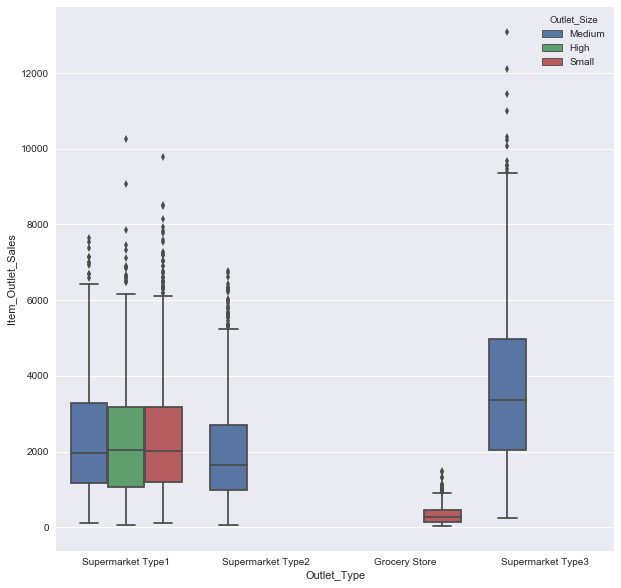

In [41]:
# EDA
plt.subplots(figsize=(10,10))

sns.boxplot(y='Item_Outlet_Sales',x='Outlet_Type',hue='Outlet_Size', data=train_df)

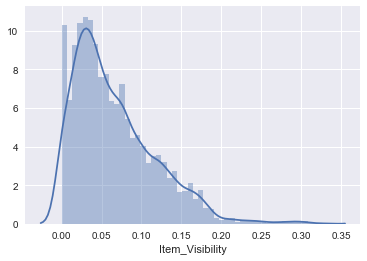

In [42]:
sns.distplot(train_df['Item_Visibility'])
#Skewed data

In [39]:
#filling missing values of Item_Weight  with the help of item identifier
train_df["Item_Weight"].fillna(train_df.groupby("Item_Identifier")["Item_Weight"].transform("mean"), inplace=True)
test_df["Item_Weight"].fillna(test_df.groupby("Item_Identifier")["Item_Weight"].transform("mean"), inplace=True)
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].median())
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df['Item_Weight'].median())


In [4]:
#Printing unique values in every coloumn
def uniq(df):
    col = df.columns
    for i in col:
        print('\n Unique value of "{}" is "{}" '.format(i,df[i].nunique()))
        #print(df[i].unique())
uniq(train_df)


 Unique value of "Item_Identifier" is "1559" 

 Unique value of "Item_Weight" is "497" 

 Unique value of "Item_Fat_Content" is "5" 

 Unique value of "Item_Visibility" is "7880" 

 Unique value of "Item_Type" is "16" 

 Unique value of "Item_MRP" is "5938" 

 Unique value of "Outlet_Identifier" is "10" 

 Unique value of "Outlet_Establishment_Year" is "9" 

 Unique value of "Outlet_Size" is "3" 

 Unique value of "Outlet_Location_Type" is "3" 

 Unique value of "Outlet_Type" is "4" 

 Unique value of "Item_Outlet_Sales" is "3493" 


In [40]:


#lf is low fat rf is regular fat

train_df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)
train_df['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)
train_df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)

test_df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)
test_df['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)
test_df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)

#train_df.loc[train_df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
#train_df['Item_Fat_Content'].value_counts()


In [41]:
#Years:
train_df['Outlet_Years'] = 2013 - train_df['Outlet_Establishment_Year']
test_df['Outlet_Years'] = 2013 - test_df['Outlet_Establishment_Year']


In [42]:
    #adding new coloumn value none for Health and hygeine, household & others

    train_df.loc[train_df['Item_Type']=='Health and Hygiene' , 'Item_Fat_Content']="Non_Edible"
    train_df.loc[train_df['Item_Type']=='Household' , 'Item_Fat_Content']="Non_Edible"
    train_df.loc[train_df['Item_Type']=='Others' , 'Item_Fat_Content']="Non_Edible"

test_df.loc[train_df['Item_Type']=='Health and Hygiene' , 'Item_Fat_Content']="Non_Edible"
test_df.loc[train_df['Item_Type']=='Household' , 'Item_Fat_Content']="Non_Edible"
test_df.loc[train_df['Item_Type']=='Others' , 'Item_Fat_Content']="Non_Edible"



In [43]:
test_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non_Edible'], dtype=object)

In [44]:
#replacing item visibility whose value is 0 by mean and reduce skewness by applying log transformation
train_df['Item_Visibility'].replace(0, np.nan, inplace=True)
train_df["Item_Visibility"].fillna(train_df.groupby("Item_Identifier")["Item_Visibility"].transform("mean"), inplace=True)
train_df['Item_Visibility']*=1000
train_df['Item_Visibility']=np.log(train_df['Item_Visibility'])

test_df['Item_Visibility'].replace(0, np.nan, inplace=True)
test_df["Item_Visibility"].fillna(test_df.groupby("Item_Identifier")["Item_Visibility"].transform("mean"), inplace=True)
test_df['Item_Visibility'] = test_df['Item_Visibility'].fillna(test_df['Item_Visibility'].median())
test_df['Item_Visibility']*=1000
test_df['Item_Visibility']=np.log(test_df['Item_Visibility'])

test_df["Item_Visibility"].isnull().sum()


0

In [45]:
# Create a broad category of Type of Item¶

train_df['Item_Identifier'].value_counts()
train_df['Item_Type_Combined'] = train_df['Item_Identifier'].apply(lambda x: x[0:2])
train_df['Item_Type_Combined'] = train_df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train_df['Item_Type_Combined'].value_counts()


test_df['Item_Identifier'].value_counts()
test_df['Item_Type_Combined'] = test_df['Item_Identifier'].apply(lambda x: x[0:2])
test_df['Item_Type_Combined'] = test_df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train_df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [46]:
#replacing outlet size relative to outlet type
train_df['Outlet_Size']=train_df.groupby('Outlet_Type').Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))
test_df['Outlet_Size']=test_df.groupby('Outlet_Type').Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))


In [47]:
#dropping Item_Identifier and Est Year 
train_df.drop('Item_Identifier', axis=1, inplace=True)
test_df.drop('Item_Identifier', axis=1, inplace=True)
train_df.drop('Outlet_Establishment_Year', axis=1, inplace=True)
test_df.drop('Outlet_Establishment_Year', axis=1, inplace=True)


In [48]:
#converting coloumns with less than 16 levels into Categorical data
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=16:
            df[i] = df[i].astype('category')
category_type(train_df)
category_type(test_df)
train_df['Outlet_Years'] = train_df['Outlet_Years'].astype('int')
test_df['Outlet_Years'] = test_df['Outlet_Years'].astype('int')
train_df.dtypes

Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type               category
Item_MRP                 float64
Outlet_Identifier       category
Outlet_Size             category
Outlet_Location_Type    category
Outlet_Type             category
Item_Outlet_Sales        float64
Outlet_Years               int32
Item_Type_Combined      category
dtype: object

In [49]:
#univariate analysis - list of categorical coloumns 
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Size', 'Outlet_Identifier','Item_Type_Combined']


In [55]:
#sns.kdeplot(train_df['Item_MRP'], shade=True)


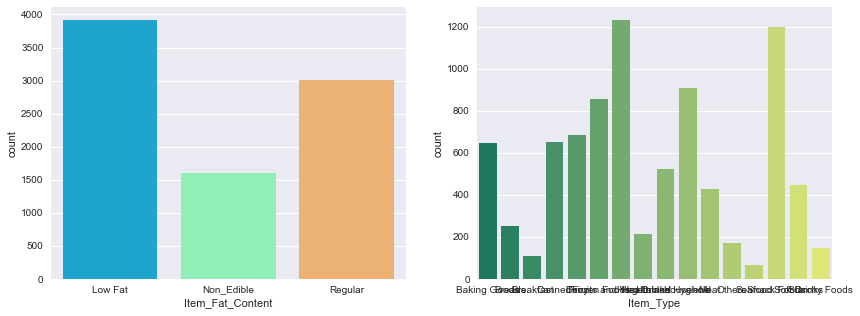

In [56]:
fig ,ax = plt.subplots(1,2,figsize=(14,5))
ax1,ax2, = ax.flatten()
sns.countplot(train_df['Item_Fat_Content'],palette='rainbow',ax=ax1)
sns.countplot(train_df['Item_Type'],palette='summer',ax=ax2)

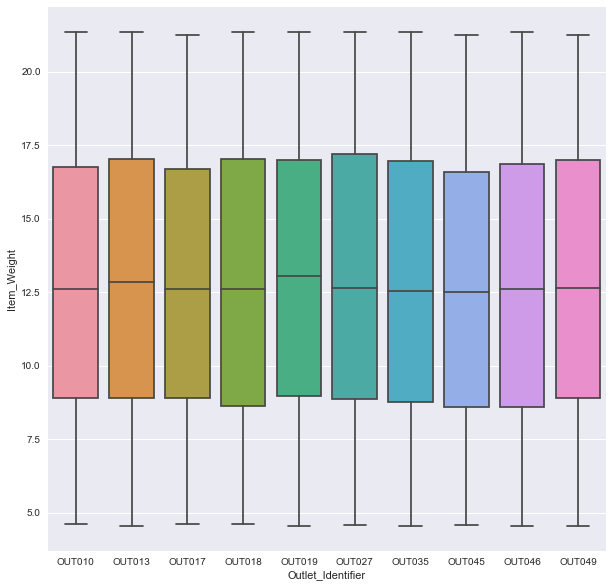

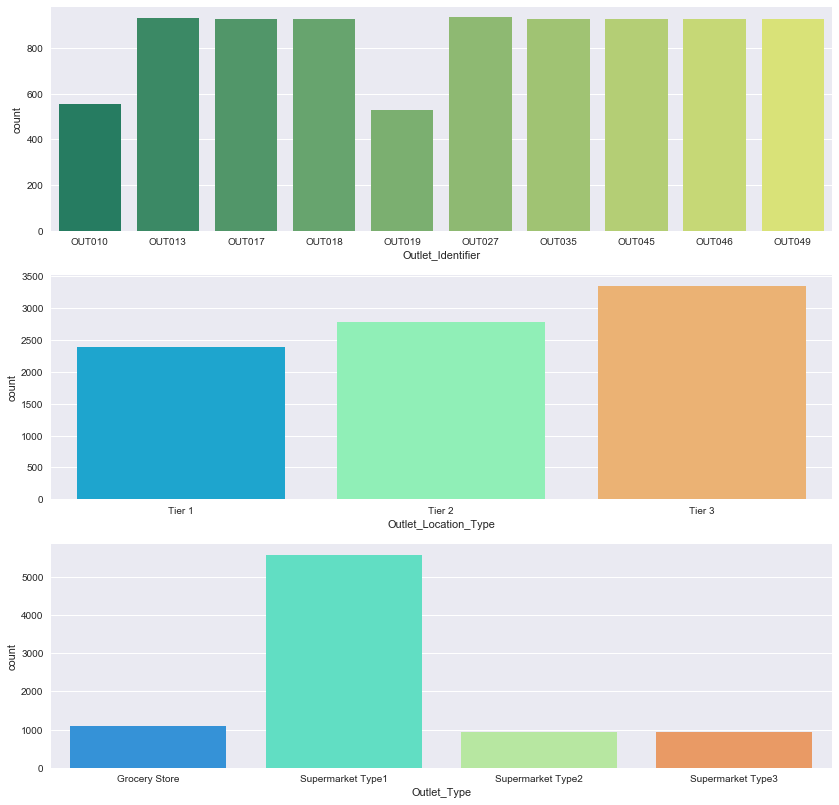

In [58]:
fig ,ax = plt.subplots(3,1,figsize=(14,14))
ax1,ax2,ax3 = ax.flatten()
sns.countplot(train_df['Outlet_Identifier'],palette='summer',ax=ax1)
sns.countplot(train_df['Outlet_Location_Type'],palette='rainbow',ax=ax2)
sns.countplot(train_df['Outlet_Type'],palette='rainbow',ax=ax3)

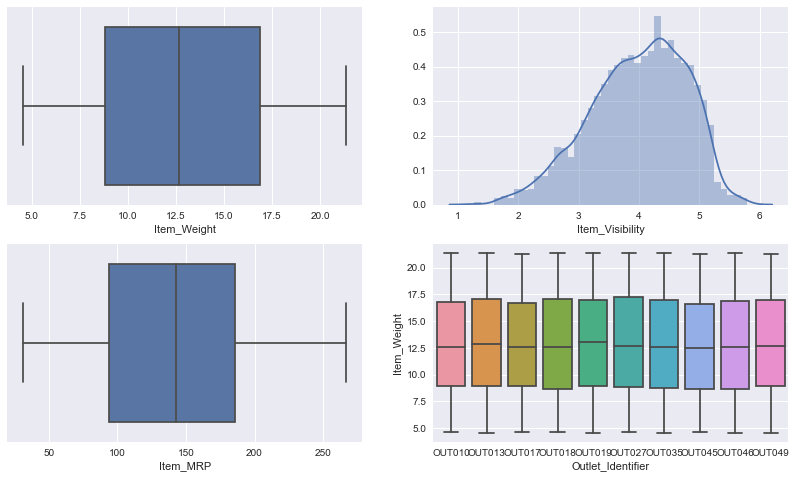

In [60]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.boxplot(x ='Item_Weight',data=train_df,ax=ax1)
sns.distplot(train_df['Item_Visibility'],ax=ax2)
sns.boxplot(x ='Item_MRP',data=train_df,ax=ax3)
sns.boxplot(y='Item_Weight',x='Outlet_Identifier', data=train_df, ax=ax4)



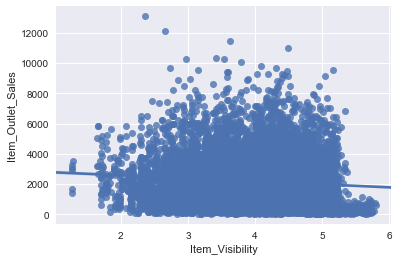

In [61]:
#item visibility has some outliers. lets plot a scatter plot against target vraible 
sns.regplot(x=train_df['Item_Visibility'],y=train_df['Item_Outlet_Sales'])

In [62]:
train_df['Item_Visibility'].describe()


count    8523.000000
mean        3.985694
std         0.788268
min         1.273881
25%         3.446633
50%         4.062164
75%         4.593771
max         5.794205
Name: Item_Visibility, dtype: float64

In [50]:
def outlier(df):
        quartile_1,quartile_3 = np.percentile(df['Item_Visibility'],[25,75])
        quartile_f,quartile_l = np.percentile(df['Item_Visibility'],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(lower_bound,upper_bound)
        print(quartile_f,quartile_l)
        
        df['Item_Visibility'].loc[df['Item_Visibility'] < lower_bound] = quartile_f
        df['Item_Visibility'].loc[df['Item_Visibility'] > upper_bound] = quartile_l
        
outlier(train_df)
outlier(test_df)

1.72592535614 6.31447853633
1.98550893708 5.42163554016
1.74466099238 6.27325549362
1.97665766194 5.47494560488


C:\Users\Kai\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
def encode_categorical(df,cat_col):
    c2,c3 = [],{}
    for c in cat_col:
        c2.append(c)
        c3[c] = c+'_'
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True)
    print(df.shape)
    return df
        

In [52]:
df1=encode_categorical(train_df,cat_col)
df2=encode_categorical(test_df,cat_col)



(8523, 40)
(5681, 39)


In [66]:
#creating interactive terms
df1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Years', 'Item_Fat_Content__Non_Edible',
       'Item_Fat_Content__Regular', 'Item_Type__Breads',
       'Item_Type__Breakfast', 'Item_Type__Canned', 'Item_Type__Dairy',
       'Item_Type__Frozen Foods', 'Item_Type__Fruits and Vegetables',
       'Item_Type__Hard Drinks', 'Item_Type__Health and Hygiene',
       'Item_Type__Household', 'Item_Type__Meat', 'Item_Type__Others',
       'Item_Type__Seafood', 'Item_Type__Snack Foods',
       'Item_Type__Soft Drinks', 'Item_Type__Starchy Foods',
       'Outlet_Location_Type__Tier 2', 'Outlet_Location_Type__Tier 3',
       'Outlet_Type__Supermarket Type1', 'Outlet_Type__Supermarket Type2',
       'Outlet_Type__Supermarket Type3', 'Outlet_Size__Medium',
       'Outlet_Size__Small', 'Outlet_Identifier__OUT013',
       'Outlet_Identifier__OUT017', 'Outlet_Identifier__OUT018',
       'Outlet_Identifier__OUT019', 'Outlet_Identifier__OUT027',
       'Outlet_Identi

In [53]:
# interaction effect 
df1['Outlet_Size__Medium_MRP']=df1.Outlet_Size__Medium.mul(df1.Item_MRP)
df1['Outlet_Size__Small_MRP']=df1.Outlet_Size__Small.mul(df1.Item_MRP)

#df2['Outlet_Size__Medium_MRP']=df2.Outlet_Size__Medium.mul(df1.Item_MRP)
#df2['Outlet_Size__Small_MRP']=df2.Outlet_Size__Small.mul(df1.Item_MRP)

In [37]:
df1.to_csv("Bigmart_analysis.csv",index=False)

In [243]:
#multi collinearity treatment 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif["features"] = df1.columns
vif.round(1)

C:\Users\Kai\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.000000,Item_Weight
1,1.100000,Item_Visibility
2,1.800000,Item_MRP
3,2.300000,Item_Outlet_Sales
4,inf,Outlet_Years
5,inf,Item_Fat_Content__Non_Edible
6,1.200000,Item_Fat_Content__Regular
7,1.400000,Item_Type__Breads
8,1.200000,Item_Type__Breakfast
9,1.900000,Item_Type__Canned


In [570]:
#df1.drop('Outlet_Size__Small', axis=1, inplace=True)
#df2.drop('Outlet_Size__Small', axis=1, inplace=True)

In [398]:
df2.head(3).T

,0,1,2
Item_Weight,20.75,8.3,14.6
Item_Visibility,0.00756484,0.0384277,0.0995749
Item_MRP,107.862,87.3198,241.754
Outlet_Identifier,OUT049,OUT017,OUT010
Item_Fat_Content__Low Fat,1,0,1
Item_Fat_Content__Regular,0,0,0
Item_Fat_Content__low fat,0,0,0
Item_Fat_Content__reg,0,1,0
Item_Type__Breads,0,0,0
Item_Type__Breakfast,0,0,0


In [54]:
y=df1['Item_Outlet_Sales']
df1.drop('Item_Outlet_Sales',axis=1,inplace=True)
#df1.drop('Outlet_Identifier',axis=1,inplace=True)
#df2.drop('Outlet_Identifier',axis=1,inplace=True)



In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm


In [56]:
lin_model = sm.OLS(y, df1).fit()


In [57]:
predictions = lin_model.predict(df1) # make the predictions by the model

In [58]:
# Print out the statistics
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     368.1
Date:                Sun, 01 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:20:28   Log-Likelihood:                -71893.
No. Observations:                8523   AIC:                         1.438e+05
Df Residuals:                    8491   BIC:                         1.441e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Item_Weight                           -0.1077      2.628     -0.041      0.967      -5.259       5.044
Item_Visibility                      -10.3827     15.899     -0.653      0.514     -41.548      20.782
Item_MRP                              17.2642      0.583     29.630      0.000      16.122      18.406
Outlet_Years                         -10.6948      3.801     -2.813      0.005     -18.146      -3.243
Item_Fat_Content__Non_Edible         -31.5929     51.539     -0.613      0.540    -132.621      69.435
Item_Fat_Content__Regular             39.9241     28.158      1.418      0.156     -15.272      95.120
Item_Type__Breads                     10.6202     83.142      0.128      0.898    -152.358     173.598
Item_Type__Breakfast                  18.0775    115.326      0.157      0.875    -207.989     244.144
Item_Type__Canned                     31.3390     62.099      0.505      0.614     -90.391     153.069
Item_Type__Dairy                     -54.0782     65.309     -0.828      0.408    -182.099      73.943
Item_Type__Frozen Foods              -29.6158     58.235     -0.509      0.611    -143.770      84.538
Item_Type__Fruits and Vegetables      33.6759     54.369      0.619      0.536     -72.901     140.253
Item_Type__Hard Drinks               -68.0212    138.105     -0.493      0.622    -338.741     202.699
Item_Type__Health and Hygiene          1.3440     46.990      0.029      0.977     -90.769      93.457
Item_Type__Household                 -27.0600     42.183     -0.641      0.521    -109.749      55.629
Item_Type__Meat                        9.1661     69.970      0.131      0.896    -127.991     146.323
Item_Type__Others                     -5.8768     65.922     -0.089      0.929    -135.100     123.346
Item_Type__Seafood                   189.6035    146.388      1.295      0.195     -97.352     476.559
Item_Type__Snack Foods               -15.4150     54.665     -0.282      0.778    -122.572      91.742
Item_Type__Soft Drinks               -77.4432    126.614     -0.612      0.541    -325.638     170.752
Item_Type__Starchy Foods              15.2323    101.937      0.149      0.881    -184.589     215.054
Outlet_Location_Type__Tier 2         540.8050     26.878     20.120      0.000     488.117     593.493
Outlet_Location_Type__Tier 3        -554.9476     48.469    -11.450      0.000    -649.959    -459.937
Outlet_Type__Supermarket Type1       630.5154     35.770     17.627      0.000     560.398     700.632
Outlet_Type__Supermarket Type2       -51.5353     34.002     -1.516      0.130    -118.187      15.116
Outlet_Type__Supermarket Type3       943.7250     26.178     36.051      0.000     892.410     995.040
Outlet_Size__Medium                   90.1344     50.277      1.793      0.073      -8.420     1

In [80]:
lm=LinearRegression()

In [81]:
lm.fit(df1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
cdf=pd.DataFrame(lm.coef_,df1.columns,columns=['Coeff'])



In [83]:
#prediction
pred=lm.predict(df2)

In [98]:
scores = cross_val_score(LinearRegression(), df1, y, scoring='r2',cv=10)


In [101]:
scores_mean=np.mean(scores)
scores_mean

0.55818058206249466

In [86]:
k=pd.DataFrame()
k['df2']=df2.isnull().sum()
k


,df2
Item_Weight,0
Item_Visibility,0
Item_MRP,0
Outlet_Years,0
Item_Fat_Content__Non_Edible,0
Item_Fat_Content__Regular,0
Item_Type__Breads,0
Item_Type__Breakfast,0
Item_Type__Canned,0
Item_Type__Dairy,0


In [87]:
pred

array([ 1847.14185152,  1515.43927884,  1909.94504793, ...,  1853.80962535,
        3560.74423873,  1287.93394413])

In [90]:
df_pred = pd.DataFrame(pred.reshape(pred.shape))
df_pred.to_csv("Bigmart_linreg.csv",index=False)

In [91]:
import xgboost as xgb 

In [92]:
from xgboost import XGBRegressor
regressor=XGBRegressor()

In [93]:
regressor.fit(df1,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [94]:
pred_xg=regressor.predict(df2)

In [95]:
pred_xg=np.abs(pred_xg)

In [96]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(regressor,df1,y,cv=10)

In [106]:
acc_mean=np.mean(acc)
acc_mean

0.59190708681713455

In [385]:
from sklearn.model_selection import GridSearchCV

In [391]:
parameters=[ {'n_estimators':[50,80,100,120,150,200,500,1000]}]

In [392]:
gridsearch=GridSearchCV(estimator=regressor, param_grid=parameters,cv=10, n_jobs=-1)

In [393]:
gridsearch=gridsearch.fit(df1,y)

In [394]:
best_para=gridsearch.best_params_
best_para

{'n_estimators': 50}

In [102]:
df_pred_xg = pd.DataFrame(pred_xg.reshape(pred_xg.shape))


In [103]:
df_pred_xg.to_csv("Bigmart_f.csv",index=False)

In [107]:
from sklearn.ensemble import RandomForestRegressor


In [108]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(df1,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=123456, verbose=0,
           warm_start=False)

In [109]:
pred_rf=rf.predict(df2)

In [110]:
pred_rf

array([ 1625.464146,  1377.493594,   559.584926, ...,  1684.134442,
        3794.667178,  1434.359572])

In [111]:
df_pred_rf = pd.DataFrame(pred_rf.reshape(pred_rf.shape))
df_pred_rf.to_csv("Bigmart_rf.csv",index=False)

In [112]:
acc=cross_val_score(rf,df1,y,cv=10)

In [113]:
acc

array([ 0.56875198,  0.58478165,  0.48994762,  0.56623972,  0.49010352,
        0.58050772,  0.58266431,  0.5646013 ,  0.60115199,  0.53894107])

In [114]:
acc_rfmean=np.mean(acc)
acc_rfmean

0.55676908789592083